In [12]:
import pandas as pd
import numpy as np

clicks_df = pd.read_csv("../wum_dataset_hw/clicks.csv")
#map_df = pd.read_csv("../wum_dataset_hw/search_engine_map.csv")[0:100]
#visitors_df = pd.read_csv("../wum_dataset_hw/visitors.csv")[0:100]

In [13]:
#grouped_transactions = clicks_df.groupby(["VisitID"])
pages = clicks_df["PageID"].unique()

## User-pageview matrix (UPM)
Matrix: transaction X pageID

In [14]:
#grouped_transactions = clicks_df.groupby(["VisitID"]).apply(lambda x: x["PageID"].value_counts())
#pd.DataFrame(index=grouped_transactions.index, columns=pages)
#grouped_transactions.index

In [15]:

def create_upm(df): 
    upm = pd.DataFrame(0, index=np.arange(len(df.groupby(["VisitID"]))), columns=pages)
    for id, (group_name, df_group) in enumerate(df.groupby(["VisitID"])):
        upm.loc[id] = df_group["PageID"].value_counts()
    upm = upm.fillna(0).astype("int")
    upm.rename_axis("Transaction", inplace=True)
    return upm

upm = create_upm(clicks_df)
upm

,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,...,5249,5250,5251,5252,5253,5254,5255,5256,5257,5258
Transaction,,,,,,,,,,,,,,,,,,,,,
0,2,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Transaction feature matrix (TFM)
Matrix: transaction X topicName

In [16]:
page_ids_per_category = clicks_df.groupby("TopicName")["PageID"].agg(pd.Series.tolist)

tfm = pd.DataFrame(0, index=np.arange(len(upm)), columns=page_ids_per_category.index)

for category, page_ids in page_ids_per_category.items():
    #pfm[category] = 
    tfm.loc[:, category] = upm[:][page_ids].sum(axis=1)

tfm.rename_axis("Transaction", inplace=True)
tfm


TopicName,Alps,Bulgaria,Corsica,Golf,Hiking,Holiday Shipping,In general,Lastminute,Lipari,Montenegro,...,Tours with lightweight tourism,VHT,Water,challenging expedition,climbing school,cyclo,exotica,hotelbuses,rafting,undetected
Transaction,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1060,0,14850,0,0,0,...,0,471,200,0,0,0,0,0,191,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,600,0,1060,0,7425,1338,0,0,...,0,471,200,0,0,0,785,232,191,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,9070,0,0,0,...,0,0,0,420,0,0,785,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,508,0,0,0,0
15556,0,120,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15557,0,577,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Filtering

Remove too short visits - transactions has to be longer 5 minutes and at least visited 2 pages

In [17]:
grouped_df = clicks_df.groupby(["VisitID"])

itemSetList = []
for  id, (group_name, df_group) in enumerate(grouped_df):
    if df_group["TimeOnPage"].sum() > 5*60 and len(df_group["TimeOnPage"]) >= 2:
        itemSetList.append(list(df_group["PageID"].values))
len(itemSetList)

2342

## Apriori

> This apriori was run on set of page ids per transactions. It shows pageID correlation - from one pageID (conversions) how much confidence that user will then open following pageID (consequent)

In [18]:
# frequentItemsets, supports = apriori(itemSetList, support=0.1)
# for f in frequentItemsets:
    # print("{} - {}".format(f,supports[f]))

from apyori import apriori

association_rules = apriori(itemSetList, minSup=0.0001, minConf=0.0001)

for item in list(association_rules):
    pair = item[0] 
    items = [x for x in pair]
    if len(items) <= 1:
        continue
    print(f"Rule: {items[0]} -> f{items[1]}")

    print(f"Support: {item[1]}")

    print(f"Confidence: {item[2][0][2]}")
    print(f"Lift: {item[2][0][3]}")
    print("=====================================")

Rule: 3044 -> f3045
Support: 0.14047822374039282
Confidence: 0.14047822374039282
Lift: 1.0
Rule: 3044 -> f3046
Support: 0.1443210930828352
Confidence: 0.1443210930828352
Lift: 1.0
Rule: 3044 -> f3052
Support: 0.10076857386848848
Confidence: 0.10076857386848848
Lift: 1.0
Rule: 3044 -> f3053
Support: 0.10119555935098207
Confidence: 0.10119555935098207
Lift: 1.0
Rule: 3058 -> f3044
Support: 0.15328778821520067
Confidence: 0.15328778821520067
Lift: 1.0


## Conversion rate
How many users actually achieved target goal - made reservation or view catalog

In [19]:
total_count = len(clicks_df)
reservationRate = len(clicks_df[clicks_df["PageName"] == "APPLICATION"]) / total_count * 100
catalogRate = len(clicks_df[clicks_df["PageName"] == "CATALOG"]) / total_count * 100

print(f"Conversion rate:\nreservations: {reservationRate}%\ncatalog: {catalogRate}%")

Conversion rate:
reservations: 0.14563611775720378%
catalog: 1.6800166441277438%


### Visualization of registration conversion
Following graph shows numbers of pages visited when session achieved "APPLICATION" page -> made reservation. When only 1 page visited, it might mean that user in some previous session already selected his target, but hesitated some time before actually submitting reservation. On the other hand multiple page views seems like user was looking around and found what he was looking for and made reservation right away

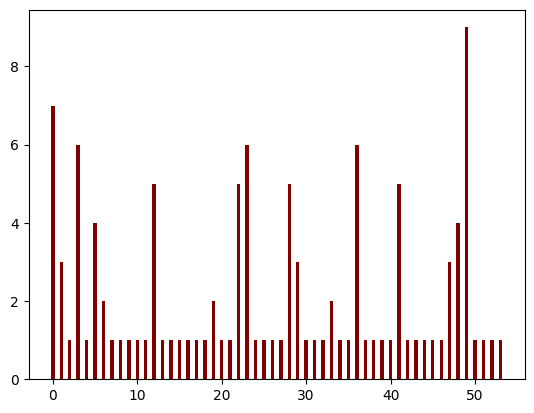

In [20]:
#create_upm(clicks_df[clicks_df["VisitID"] == clicks_df[clicks_df["PageName"] == "APPLICATION"]["VisitID"]])
import matplotlib.pyplot as plt

visit_ids_for_registration = clicks_df[clicks_df["PageName"] == "APPLICATION"]["VisitID"]

filtered_visits = clicks_df.loc[clicks_df["VisitID"].isin(visit_ids_for_registration.values)]

page_visited = create_upm(filtered_visits.reset_index()).sum(axis=1)
plt.bar(page_visited.index, page_visited.values, color ='maroon',
        width = 0.4)
plt.show()


In [21]:
discountRate = len(clicks_df[clicks_df["PageName"] == "DISCOUNT"]) / total_count * 100
insuranceRate = len(clicks_df[clicks_df["PageName"] == "INSURANCE"]) / total_count * 100

print(f"Micro conversion rate:\ndiscount: {discountRate}%\ninsurance: {catalogRate}%")

Micro conversion rate:
discount: 0.6345573702278164%
insurance: 1.6800166441277438%


## Clustering
Idea was following: get matrix transactions X pageID (upm), convert to binary, calculate euclidean distances -> look for simillar distance based on treshold. Treshold can by either static or dynamic based on how many clusters we want

In [22]:
from scipy.spatial.distance import pdist, squareform

upm_cliped = upm.clip(upper=1)
distances = pdist(upm_cliped.values, metric='euclidean')
dist_matrix = squareform(distances)

In [ ]:
min = np.ndarray.min(dist_matrix)
max = np.ndarray.max(dist_matrix)

clusters = 10
cluster_size = (max - min) / clusters

> I found out, that for this I can't just use K-means clustering, but something different such as hierarchical clustering - unfortunately I do not have enough time to finish this

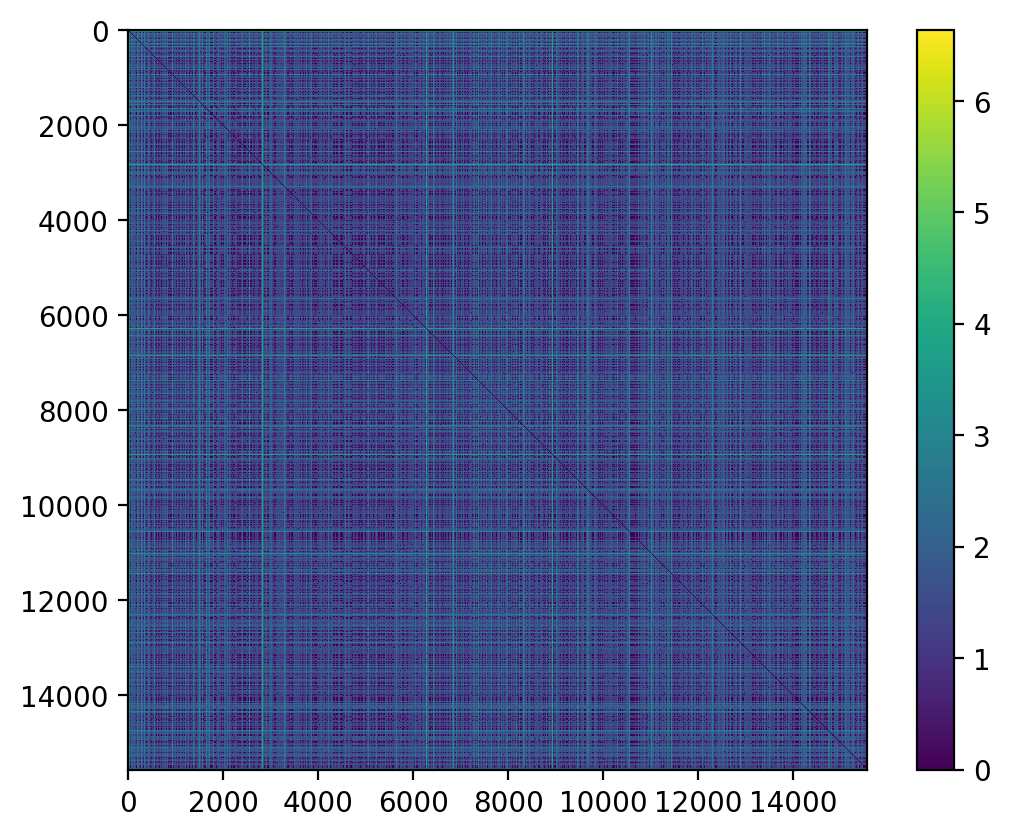

In [ ]:
from matplotlib import pyplot as plt;

plt.imshow(dist_matrix, interpolation='none');
plt.colorbar();
plt.show()